'''Proposal:
    Topic:  Analyze the impact of pandemic on the NASDAQ.
    Detail: We will be doing a technical analysis of the NASDAQ. 
    We will be scraping data from Yahoo Finance retrieve data on the stocks 
    from 01/01/2020 through now. For this data, we will use matplotlib to
    visualize the data and track the changes of stock price before and after the pandemic. 
    We will get data such as P/E ratio from the past and forward P/E to expect 
    the PE ratio in a year, earning per share (EPS) to understand the value of their shares,
    price to earnings growth ratio (PEG Ratio) to compare the companies’
    PE ratio to their expected rate of growth, and return on equity which will help us 
    measure the profitability of a company related to their shareholders’ equity to
    understand the NASDAQ during this period.
'''


In [12]:
#Import Libraries needed
import requests
import pandas
import numpy as np
from bs4 import BeautifulSoup
from openpyxl import Workbook


# Part 1

In [13]:
#We use the workbook function to convert data to an Excel file
wb=Workbook()
ws=wb.active
title=['Date','Open','High','Low','Close','Adj Close','Volumn']
ws.append(title)

In [14]:
#We web scrape the data here from Yahoo Finance of the stock price from 01/01/2020 to now.
url='https://finance.yahoo.com/quote/%5EIXIC/history?period1=1577836800&period2=1635984000&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true'
header={
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36 Edg/94.0.992.38'
}
datas={
    'ajax':'true',
    'mobile':'false'
}
file=[]
r=requests.get(url,headers=header,data=datas)
html_soup=BeautifulSoup(r.text,'html.parser')

In [15]:
#Each day has 7 rows of data, so here we set up the 7 rows as a list and add to our excel file.
y=0

for x in html_soup.find_all('td'):
    if y<7:
        content=x.get_text()
        file.append(content)
        if y!=6:
            y+=1
        else:
            ws.append(file)
            y=0
            file.clear()
    else:
        print('')

In [16]:
wb.save('his_data.xlsx')

In [17]:
#Here we retrieve common statistics to help us understand the NASDAQ
url2='https://finance.yahoo.com/quote/NDAQ/key-statistics?p=NDAQ'
header2={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36 Edg/94.0.992.50'
}
r2=requests.get(url2,headers=header2)
html_soup2=BeautifulSoup(r2.text,'html.parser')
stock={
    'Trailing P/E': html_soup2.find_all('td',class_='Fw(500) Ta(end) Pstart(10px) Miw(60px)')[2].text,
    'Foward P/E': html_soup2.find_all('td',class_='Fw(500) Ta(end) Pstart(10px) Miw(60px)')[3].text,
    'PEG Ratio': html_soup2.find_all('td',class_='Fw(500) Ta(end) Pstart(10px) Miw(60px)')[4].text,
    'Diluted EPS': html_soup2.find_all('td',class_='Fw(500) Ta(end) Pstart(10px) Miw(60px)')[50].text,
    'Return on Equity': html_soup2.find_all('td',class_='Fw(500) Ta(end) Pstart(10px) Miw(60px)')[43].text
}
s=pandas.DataFrame.from_dict(stock,orient='index')
statistics=s.rename(columns={0:'num'})
print(statistics)

                     num
Trailing P/E      22.93%
Foward P/E        214.96
PEG Ratio         123.90
Diluted EPS        1.06B
Return on Equity    322M


# Part 2

In [18]:
#We use pandas here to read the data from the excel file and convert it into dataframe
pd=pandas.read_excel('his_data.xlsx')
df=pandas.DataFrame(pd)
print(df)


            Date       Open       High        Low      Close  Adj Close  \
0   Nov 02, 2021  15,658.52  15,821.57  15,616.44  15,811.58  15,811.58   
1   Oct 26, 2021  15,276.00  15,656.60  15,235.84  15,649.60  15,649.60   
2   Oct 19, 2021  15,160.00  15,384.00  15,021.02  15,235.71  15,235.71   
3   Oct 12, 2021  14,537.17  15,137.85  14,471.88  15,129.09  15,129.09   
4   Oct 05, 2021  14,289.45  14,755.72  14,259.07  14,465.92  14,465.92   
..           ...        ...        ...        ...        ...        ...   
92  Jan 29, 2020   9,318.26   9,485.38   9,123.22   9,467.97   9,467.97   
93  Jan 22, 2020   9,413.61   9,451.43   9,088.04   9,269.68   9,269.68   
94  Jan 15, 2020   9,253.76   9,397.58   9,231.14   9,370.81   9,370.81   
95  Jan 08, 2020   9,068.03   9,298.33   9,059.38   9,251.33   9,251.33   
96  Jan 01, 2020   9,039.46   9,093.43   8,943.50   9,068.58   9,068.58   

            Volumn  
0    5,274,520,000  
1   27,411,610,000  
2   27,399,530,000  
3   21,332,430,

In [19]:
#We can find out which dates close price was more than its Open price
open_arr=np.array(df.Open)
close_arr=np.array(df.Close)
for n in range(len(open_arr)):
    if close_arr[n]>open_arr[n]:
        print(df.Date[n])

Nov 02, 2021
Oct 26, 2021
Oct 19, 2021
Oct 12, 2021
Oct 05, 2021
Aug 31, 2021
Aug 24, 2021
Aug 17, 2021
Aug 03, 2021
Jul 27, 2021
Jul 20, 2021
Jun 29, 2021
Jun 22, 2021
Jun 15, 2021
Jun 08, 2021
Jun 01, 2021
May 25, 2021
May 18, 2021
May 11, 2021
Apr 20, 2021
Apr 06, 2021
Mar 30, 2021
Mar 10, 2021
Feb 03, 2021
Jan 27, 2021
Jan 20, 2021
Jan 13, 2021
Jan 06, 2021
Dec 23, 2020
Dec 16, 2020
Dec 09, 2020
Dec 02, 2020
Nov 25, 2020
Nov 18, 2020
Nov 11, 2020
Nov 04, 2020
Oct 06, 2020
Sep 29, 2020
Sep 22, 2020
Sep 08, 2020
Aug 25, 2020
Aug 18, 2020
Aug 11, 2020
Jul 28, 2020
Jul 14, 2020
Jul 07, 2020
Jun 30, 2020
Jun 09, 2020
Jun 02, 2020
May 26, 2020
May 19, 2020
May 12, 2020
May 05, 2020
Apr 28, 2020
Apr 21, 2020
Apr 07, 2020
Mar 31, 2020
Mar 24, 2020
Mar 17, 2020
Feb 12, 2020
Feb 05, 2020
Jan 29, 2020
Jan 15, 2020
Jan 08, 2020
Jan 01, 2020


# Part 4

In [21]:
datass=pandas.read_csv('NASDAQ.csv')
df_stock=pandas.DataFrame(datass)
close_price=df_stock['Close']
nasdaq_return=np.log(close_price).diff()
nasdaq_return.head()

0         NaN
1    0.019952
2    0.012832
3   -0.010851
4    0.021166
Name: Close, dtype: float64

<AxesSubplot:>

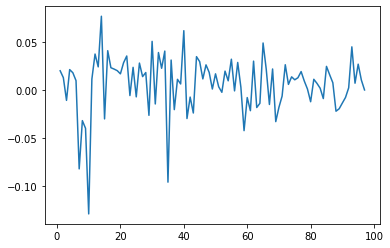

In [22]:
#Visualize data
nasdaq_return.plot()

In [23]:
nasdaq_return.describe()

count    97.000000
mean      0.005731
std       0.029805
min      -0.128945
25%      -0.007934
50%       0.010569
75%       0.023127
max       0.076667
Name: Close, dtype: float64

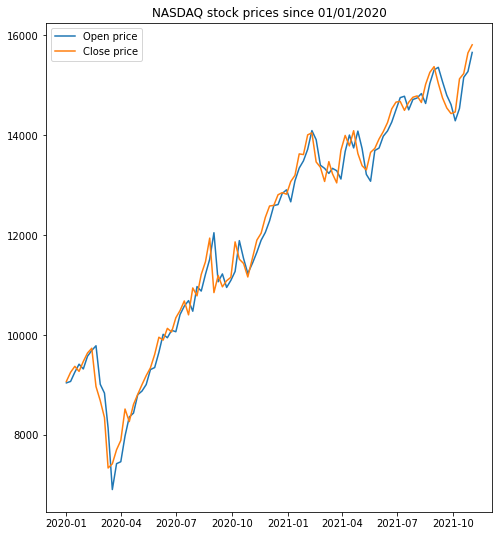

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
pd=pandas.read_excel('his_data.xlsx')
df=pandas.DataFrame(pd)



open_price=[]
for num in df['Open']:
    x=num.replace(',','')
    numeric=float(x)
    open_price.append(numeric)
    
close_price=[]
for a in df['Close']:
    y=a.replace(',','')
    numbers=float(y)
    close_price.append(numbers)

dates=list(df['Date'])

date=[dt.datetime.strptime(d,"%b %d, %Y").date() for d in dates]


plt.title(label='NASDAQ stock prices since 01/01/2020')
plt.plot(date,open_price,label='Open price')
plt.plot(date,close_price, label='Close price')
plt.legend(loc="upper left")
plt.gcf().set_size_inches(8,9)
plt.show()

As we can see from our visualizations since the rise of the COVID-19 pandemic the NASDAQ rebounded very strongly from the low point of March 2020 to record highs in October of 2021.

# Reference

In [ ]:
'''
https://finance.yahoo.com/quote/%5EIXIC/history?period1=1577836800&period2=1633824000&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true
https://finance.yahoo.com/quote/NDAQ/key-statistics?p=NDAQ
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
https://openpyxl.readthedocs.io/en/stable/
'''